In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

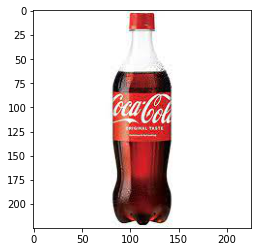

In [3]:
img=image.load_img('imagebase/Train/Coke/1.jpg')
plt.imshow(img)

In [4]:
cv2.imread('imagebase/Train/Coke/3.jpg').shape

(295, 171, 3)

### Scaling training and validation images by deviding each pixel by 255.

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

### Generating Training,Validation and testing data and associated labels with run time data augmentation

In [6]:
train_data=train.flow_from_directory('imagebase/Train/',
                                    target_size=(200,200),
                                    color_mode='rgb',
                                    class_mode='binary')
validation_data=validation.flow_from_directory('imagebase/Validation/',
                                    target_size=(200,200),
                                    color_mode='rgb',
                                    class_mode='binary')
test_data=train.flow_from_directory('imagebase/Test/',
                                    target_size=(200,200),
                                    color_mode='rgb',
                                    class_mode='binary')

Found 520 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


### There are 3 classes in the dataset i.e. '100%', 'Less than 50%', and 'More than 50%'

#### As Neural Networks can not process categorical class labels, 1D integer labels are assigned as 3 different class labels

In [7]:
train_data.class_indices, validation_data.class_indices, test_data.class_indices

({'Coke': 0, 'Pepsi': 1}, {'Coke': 0, 'Pepsi': 1}, {'Coke': 0, 'Pepsi': 1})

In [8]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
model = Sequential([
    layers.Conv2D(16, 3, strides=1, padding='same', activation='relu',  input_shape=(200,200,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [20]:
fit_model=model.fit(train_data,
                   epochs=23,
                   validation_data=validation_data)

Epoch 1/19
17/17 [==============================] - 18s 974ms/step - loss: 1.2230 - accuracy: 0.6115 - val_loss: 0.4409 - val_accuracy: 0.8556
Epoch 2/19
17/17 [==============================] - 16s 888ms/step - loss: 0.4574 - accuracy: 0.7846 - val_loss: 0.3642 - val_accuracy: 0.8667
Epoch 3/19
17/17 [==============================] - 15s 857ms/step - loss: 0.3142 - accuracy: 0.8596 - val_loss: 0.3160 - val_accuracy: 0.8444
Epoch 4/19
17/17 [==============================] - 15s 906ms/step - loss: 0.2887 - accuracy: 0.9038 - val_loss: 0.1940 - val_accuracy: 0.9111
Epoch 5/19
17/17 [==============================] - 14s 833ms/step - loss: 0.2499 - accuracy: 0.9000 - val_loss: 0.1764 - val_accuracy: 0.9444
Epoch 6/19
17/17 [==============================] - 15s 907ms/step - loss: 0.1309 - accuracy: 0.9615 - val_loss: 0.2489 - val_accuracy: 0.9222
Epoch 7/19
17/17 [==============================] - 14s 843ms/step - loss: 0.1265 - accuracy: 0.9615 - val_loss: 0.3372 - val_accuracy: 0.8889

### Model Architecture

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)      

#### Train accuracy VS. Validation accuracy

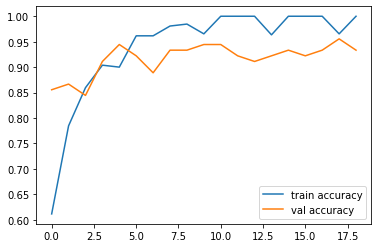

In [22]:
plt.plot(fit_model.history['accuracy'], label='train accuracy')
plt.plot(fit_model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

#### Train Loss Vs. Validation Loss

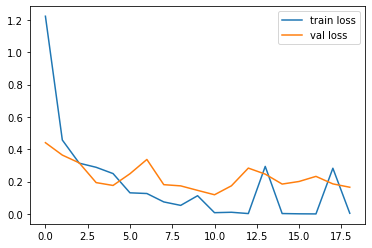

In [23]:
plt.plot(fit_model.history['loss'], label='train loss')
plt.plot(fit_model.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

### Model Evaluation

In [20]:
print('Train loss & accuracy:',model.evaluate(train_data))
print('Validation loss & accuracy:',model.evaluate(validation_data))
print('Test loss & accuracy:',model.evaluate(test_data))

17/17 [==============================] - 9s 522ms/step - loss: 3.1148e-06 - accuracy: 1.0000
training loss & accuracy: [3.114849960184074e-06, 1.0]
3/3 [==============================] - 2s 725ms/step - loss: 0.3075 - accuracy: 0.9111
validation loss & accuracy: [0.3074721097946167, 0.9111111164093018]
3/3 [==============================] - 1s 393ms/step - loss: 0.0288 - accuracy: 0.9783
test loss & accuracy: [0.0288164671510458, 0.97826087474823]


In [25]:
print('Trai loss & accuracy:',model.evaluate(train_data))
print('Validation loss & accuracy:',model.evaluate(validation_data))
print('Test loss & accuracy:',model.evaluate(test_data))

17/17 [==============================] - 9s 554ms/step - loss: 0.0017 - accuracy: 1.0000
Trai loss & accuracy: [0.0016984372632578015, 1.0]
3/3 [==============================] - 2s 571ms/step - loss: 0.1654 - accuracy: 0.9333
Validation loss & accuracy: [0.16536612808704376, 0.9333333373069763]
3/3 [==============================] - 1s 392ms/step - loss: 0.0257 - accuracy: 0.9891
Test loss & accuracy: [0.025655139237642288, 0.989130437374115]


### Testing model with Test dataset

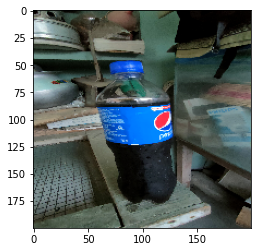

1/1 [==============================] - 0s 95ms/step
This is pepsi


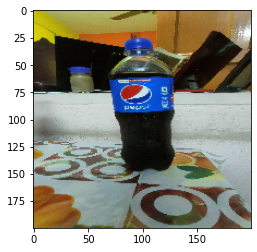

1/1 [==============================] - 0s 32ms/step
This is pepsi


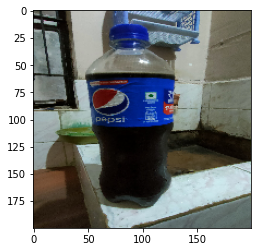

1/1 [==============================] - 0s 41ms/step
This is pepsi


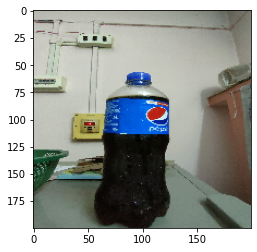

1/1 [==============================] - 0s 31ms/step
This is pepsi


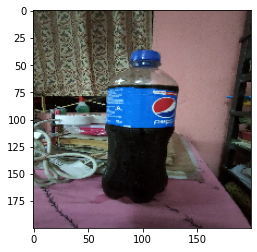

1/1 [==============================] - 0s 32ms/step
This is pepsi


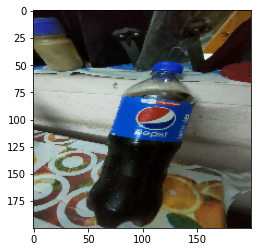

1/1 [==============================] - 0s 32ms/step
This is pepsi


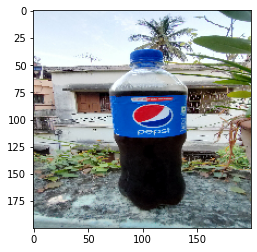

1/1 [==============================] - 0s 33ms/step
This is pepsi


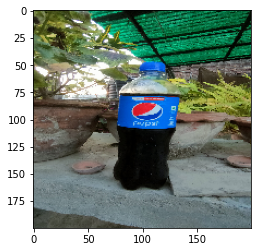

1/1 [==============================] - 0s 32ms/step
This is pepsi


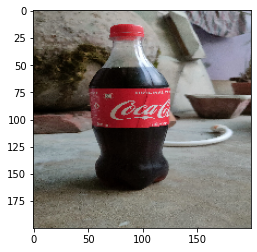

1/1 [==============================] - 0s 24ms/step
This is coke


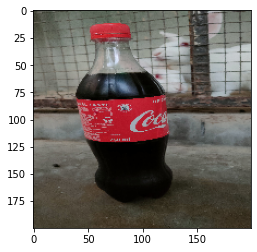

1/1 [==============================] - 0s 16ms/step
This is coke


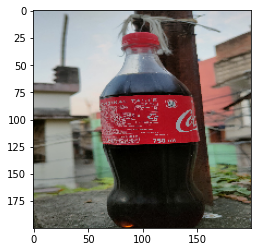

1/1 [==============================] - 0s 25ms/step
This is coke


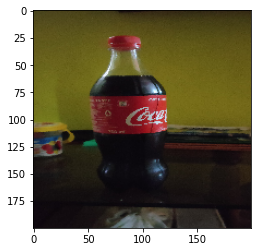

1/1 [==============================] - 0s 18ms/step
This is coke


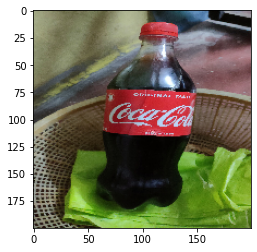

1/1 [==============================] - 0s 25ms/step
This is coke


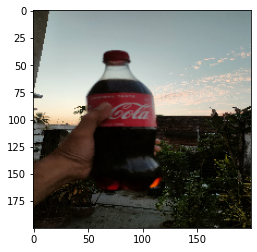

1/1 [==============================] - 0s 24ms/step
This is coke


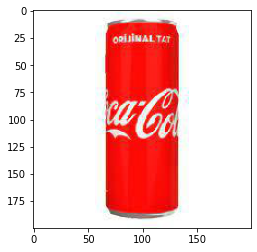

1/1 [==============================] - 0s 32ms/step
This is coke


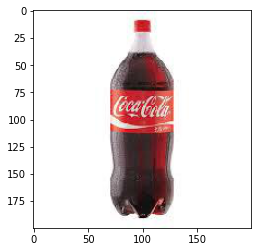

1/1 [==============================] - 0s 24ms/step
This is coke


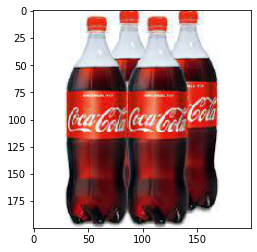

1/1 [==============================] - 0s 24ms/step
This is coke


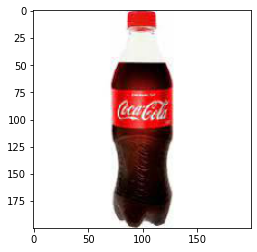

1/1 [==============================] - 0s 24ms/step
This is coke


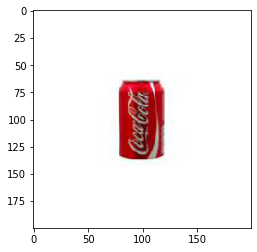

1/1 [==============================] - 0s 24ms/step
This is coke


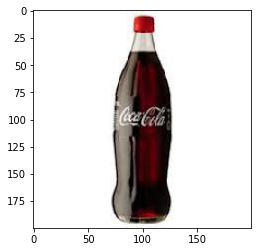

1/1 [==============================] - 0s 24ms/step
This is coke


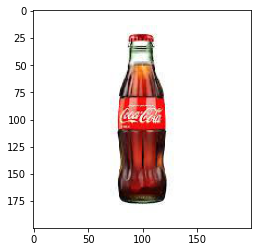

1/1 [==============================] - 0s 25ms/step
This is coke


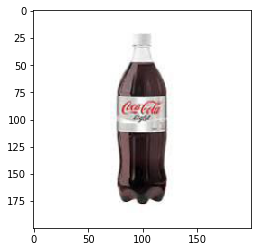

1/1 [==============================] - 0s 24ms/step
This is coke


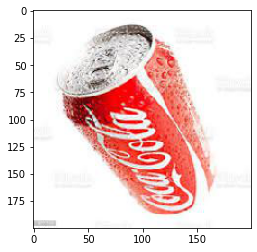

1/1 [==============================] - 0s 32ms/step
This is coke


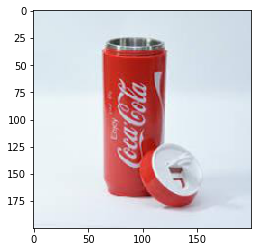

1/1 [==============================] - 0s 32ms/step
This is coke


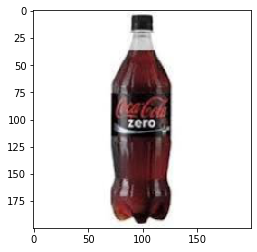

1/1 [==============================] - 0s 16ms/step
This is coke


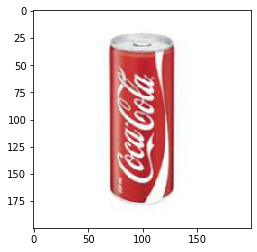

1/1 [==============================] - 0s 32ms/step
This is coke


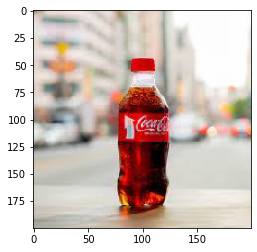

1/1 [==============================] - 0s 16ms/step
This is coke


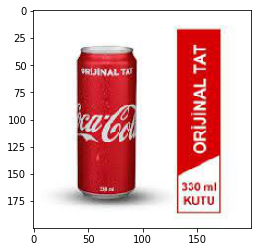

1/1 [==============================] - 0s 24ms/step
This is coke


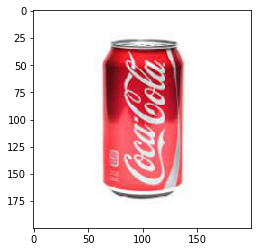

1/1 [==============================] - 0s 32ms/step
This is coke


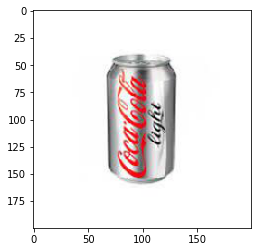

1/1 [==============================] - 0s 16ms/step
This is coke


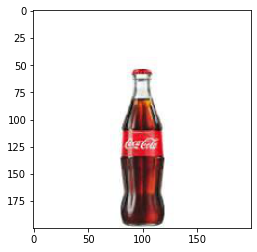

1/1 [==============================] - 0s 24ms/step
This is coke


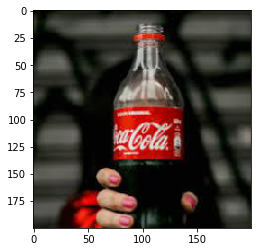

1/1 [==============================] - 0s 16ms/step
This is coke


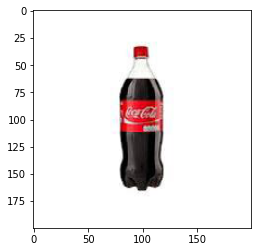

1/1 [==============================] - 0s 18ms/step
This is coke


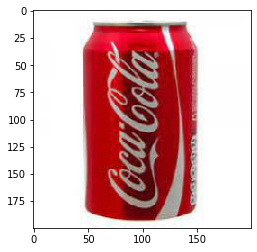

1/1 [==============================] - 0s 16ms/step
This is coke


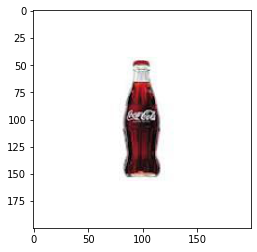

1/1 [==============================] - 0s 24ms/step
This is coke


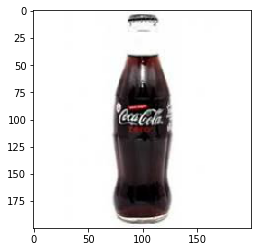

1/1 [==============================] - 0s 16ms/step
This is coke


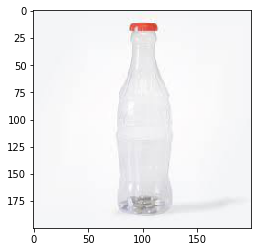

1/1 [==============================] - 0s 20ms/step
This is coke


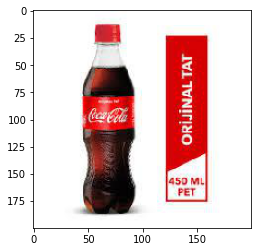

1/1 [==============================] - 0s 24ms/step
This is coke


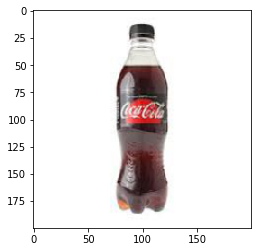

1/1 [==============================] - 0s 23ms/step
This is coke


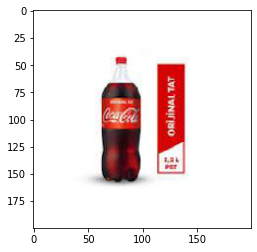

1/1 [==============================] - 0s 24ms/step
This is coke


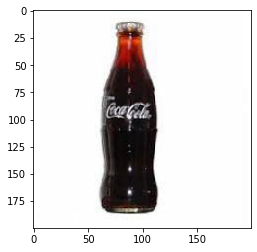

1/1 [==============================] - 0s 24ms/step
This is coke


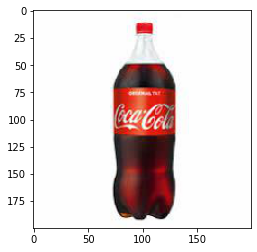

1/1 [==============================] - 0s 24ms/step
This is coke


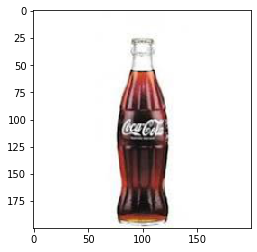

1/1 [==============================] - 0s 24ms/step
This is coke


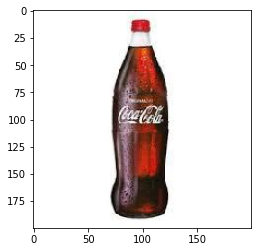

1/1 [==============================] - 0s 24ms/step
This is coke


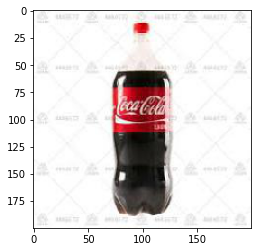

1/1 [==============================] - 0s 32ms/step
This is coke


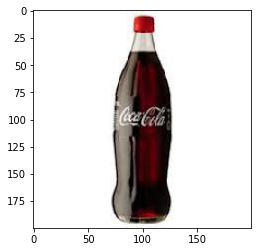

1/1 [==============================] - 0s 32ms/step
This is coke


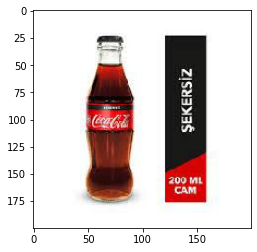

1/1 [==============================] - 0s 24ms/step
This is coke


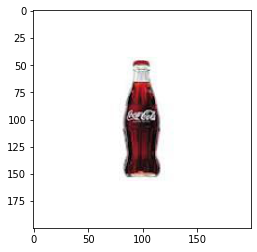

1/1 [==============================] - 0s 31ms/step
This is coke


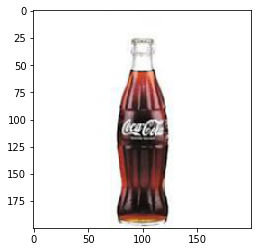

1/1 [==============================] - 0s 24ms/step
This is coke


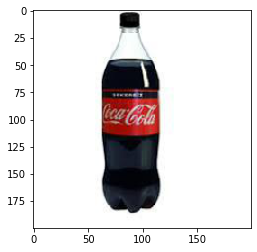

1/1 [==============================] - 0s 25ms/step
This is coke


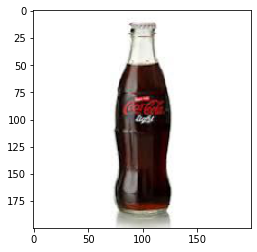

1/1 [==============================] - 0s 24ms/step
This is coke


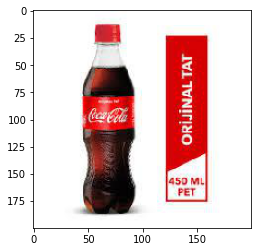

1/1 [==============================] - 0s 16ms/step
This is coke


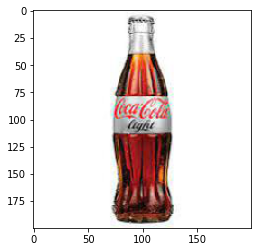

1/1 [==============================] - 0s 26ms/step
This is coke


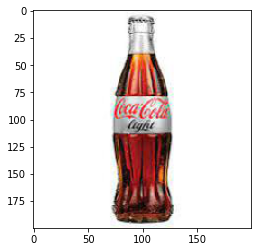

1/1 [==============================] - 0s 16ms/step
This is coke


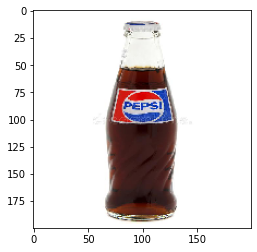

1/1 [==============================] - 0s 24ms/step
This is pepsi


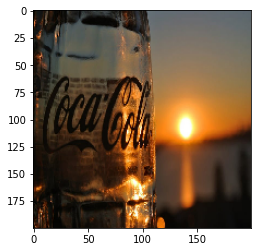

1/1 [==============================] - 0s 31ms/step
This is coke


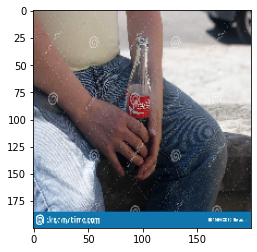

1/1 [==============================] - 0s 24ms/step
This is coke


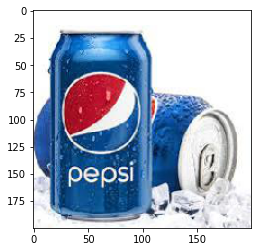

1/1 [==============================] - 0s 25ms/step
This is pepsi


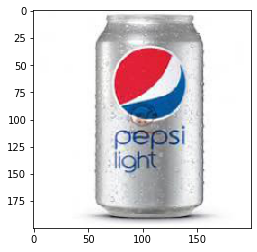

1/1 [==============================] - 0s 24ms/step
This is pepsi


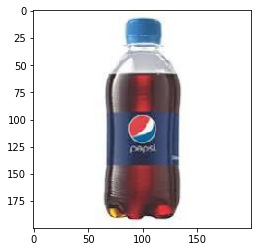

1/1 [==============================] - 0s 24ms/step
This is pepsi


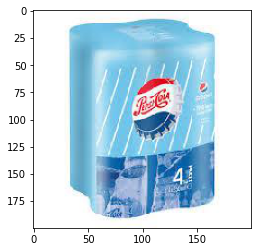

1/1 [==============================] - 0s 32ms/step
This is pepsi


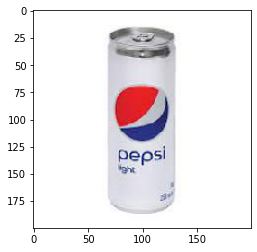

1/1 [==============================] - 0s 21ms/step
This is pepsi


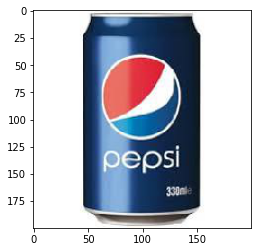

1/1 [==============================] - 0s 25ms/step
This is pepsi


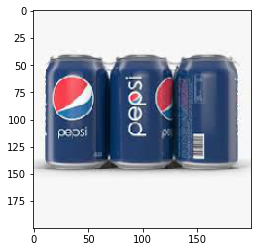

1/1 [==============================] - 0s 24ms/step
This is pepsi


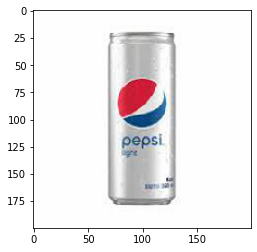

1/1 [==============================] - 0s 24ms/step
This is pepsi


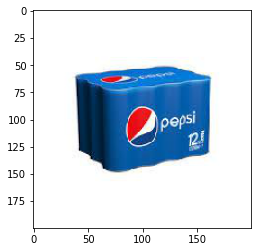

1/1 [==============================] - 0s 25ms/step
This is pepsi


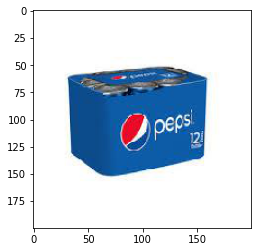

1/1 [==============================] - 0s 24ms/step
This is pepsi


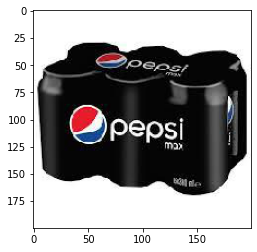

1/1 [==============================] - 0s 16ms/step
This is pepsi


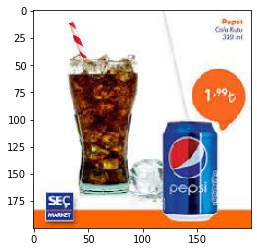

1/1 [==============================] - 0s 24ms/step
This is pepsi


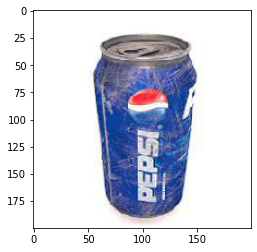

1/1 [==============================] - 0s 24ms/step
This is pepsi


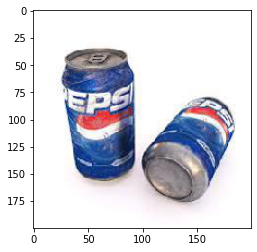

1/1 [==============================] - 0s 13ms/step
This is pepsi


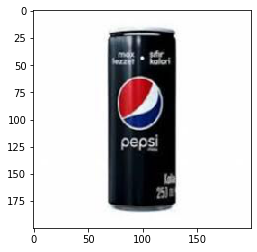

1/1 [==============================] - 0s 30ms/step
This is pepsi


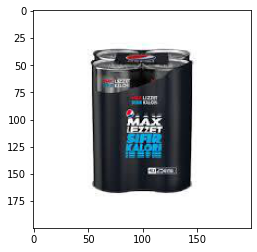

1/1 [==============================] - 0s 22ms/step
This is pepsi


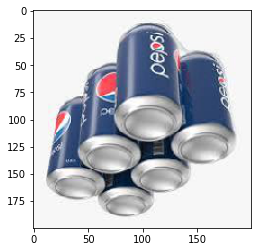

1/1 [==============================] - 0s 16ms/step
This is pepsi


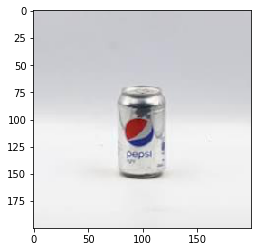

1/1 [==============================] - 0s 24ms/step
This is pepsi


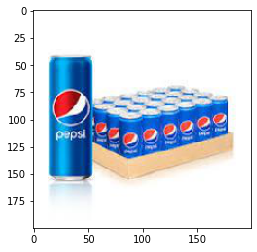

1/1 [==============================] - 0s 24ms/step
This is pepsi


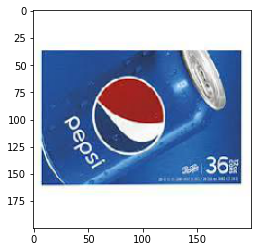

1/1 [==============================] - 0s 25ms/step
This is pepsi


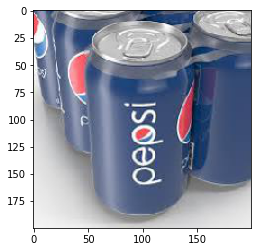

1/1 [==============================] - 0s 31ms/step
This is pepsi


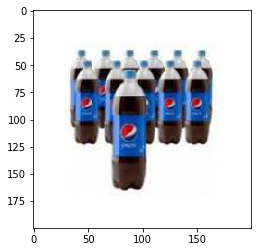

1/1 [==============================] - 0s 24ms/step
This is pepsi


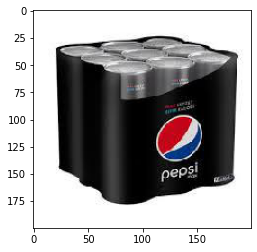

1/1 [==============================] - 0s 16ms/step
This is pepsi


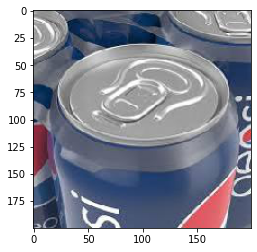

1/1 [==============================] - 0s 24ms/step
This is pepsi


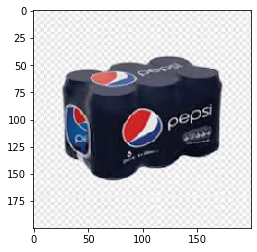

1/1 [==============================] - 0s 25ms/step
This is pepsi


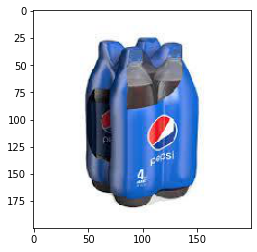

1/1 [==============================] - 0s 32ms/step
This is pepsi


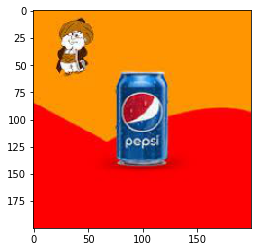

1/1 [==============================] - 0s 24ms/step
This is pepsi


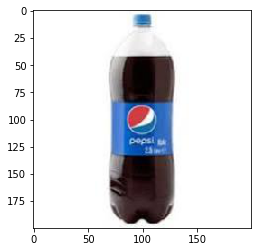

1/1 [==============================] - 0s 24ms/step
This is pepsi


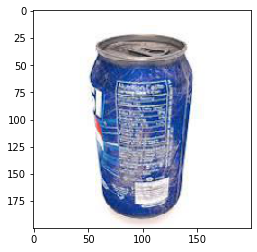

1/1 [==============================] - 0s 32ms/step
This is pepsi


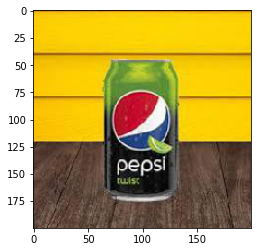

1/1 [==============================] - 0s 24ms/step
This is pepsi


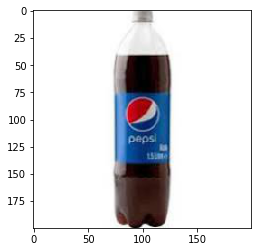

1/1 [==============================] - 0s 32ms/step
This is pepsi


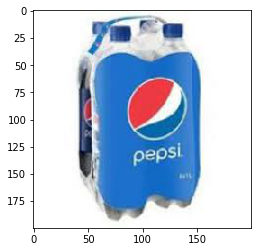

1/1 [==============================] - 0s 24ms/step
This is pepsi


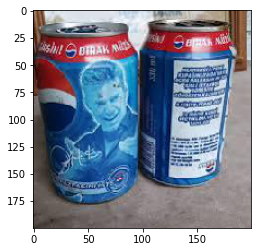

1/1 [==============================] - 0s 24ms/step
This is pepsi


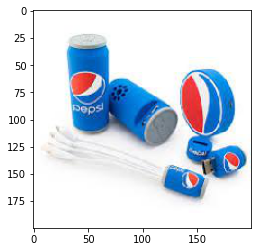

1/1 [==============================] - 0s 32ms/step
This is pepsi


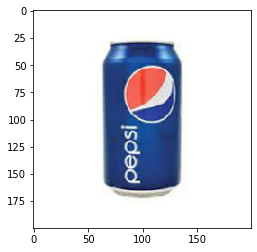

1/1 [==============================] - 0s 32ms/step
This is pepsi


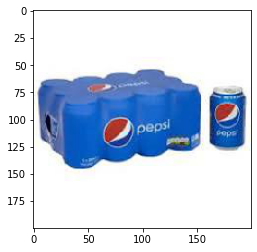

1/1 [==============================] - 0s 25ms/step
This is pepsi


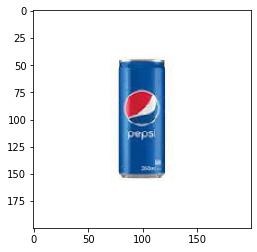

1/1 [==============================] - 0s 33ms/step
This is pepsi


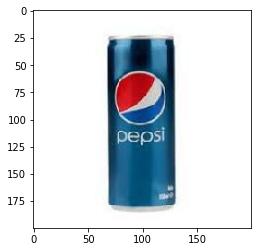

1/1 [==============================] - 0s 23ms/step
This is pepsi


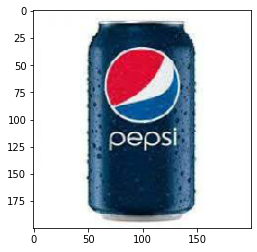

1/1 [==============================] - 0s 22ms/step
This is pepsi


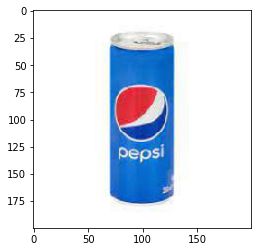

1/1 [==============================] - 0s 24ms/step
This is pepsi


In [26]:
dir_path='imagebase/Test_nonLabeled/'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    result=model.predict(images)
    if result==0:
        print('This is coke')
    else:
        print('This is pepsi')
    
    

Achieved True positive output for all the datas in the test dataset.

1/1 [==============================] - 0s 24ms/step
this is coke


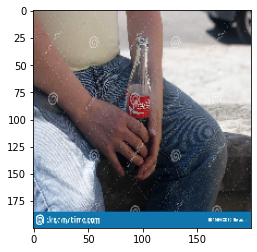

In [27]:
img=image.load_img('imagebase/Test_nonLabeled/new_image3.jpg', target_size=(200,200))
plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
res=model.predict(x)
if res==0:
    print('this is coke')
else:
    print('this is pepsi')

1/1 [==============================] - 0s 24ms/step
this is coke


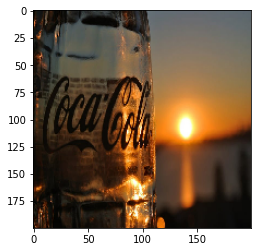

In [28]:
img=image.load_img('imagebase/Test_nonLabeled/new_image2.jpg', target_size=(200,200))
plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
res=model.predict(x)
if res==0:
    print('this is coke')
else:
    print('this is pepsi')


In [29]:
model.save("brand_classification_model.h5")